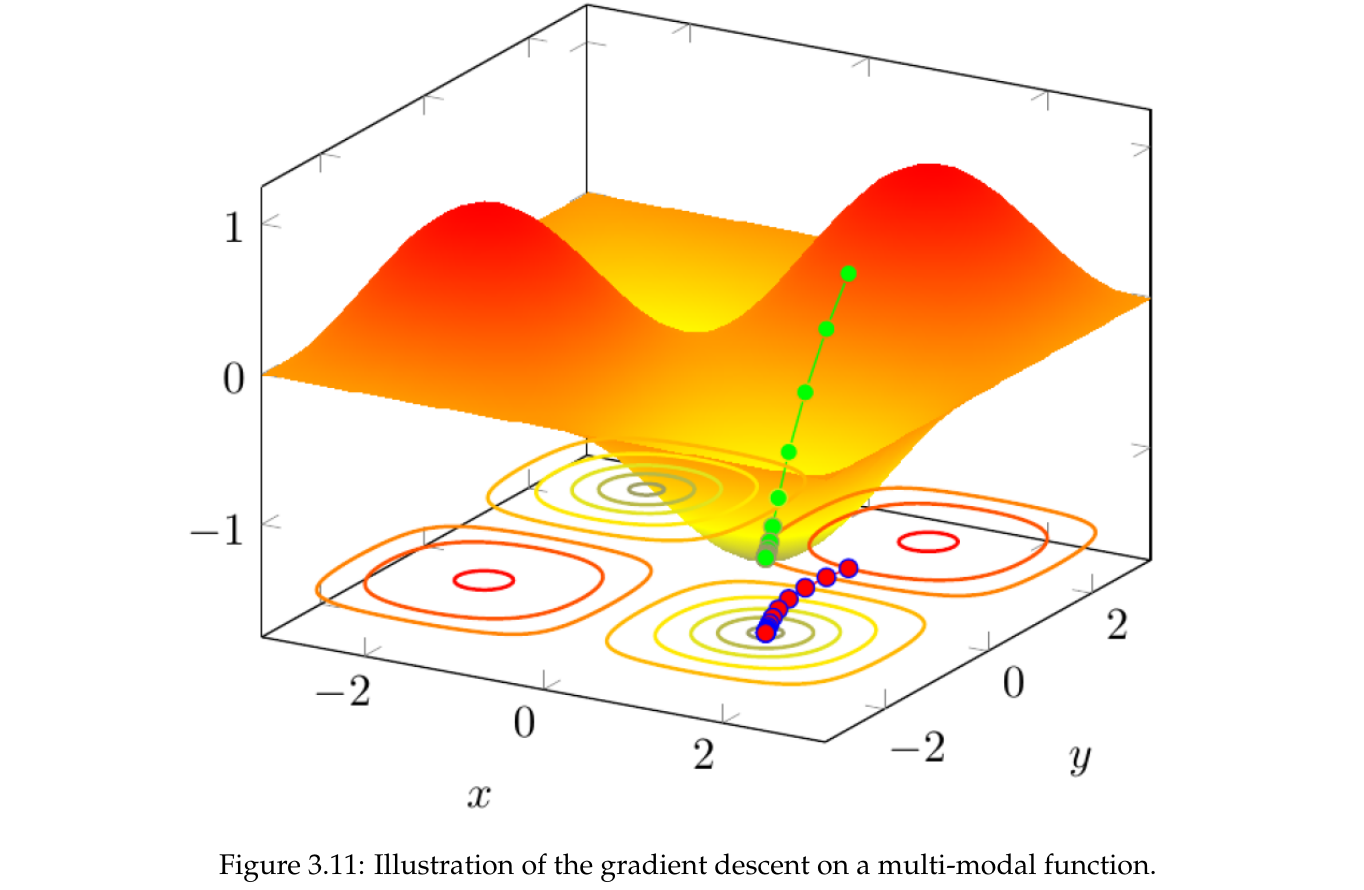

# Mas "features" (caracteristicas). Mas dimensiones
En este caso la funcion objetivo es multivariada.
Por ejemplo en la ilustracion de la casa que queremos vender, ademas del area  podriamos considerar el numero de cuartos

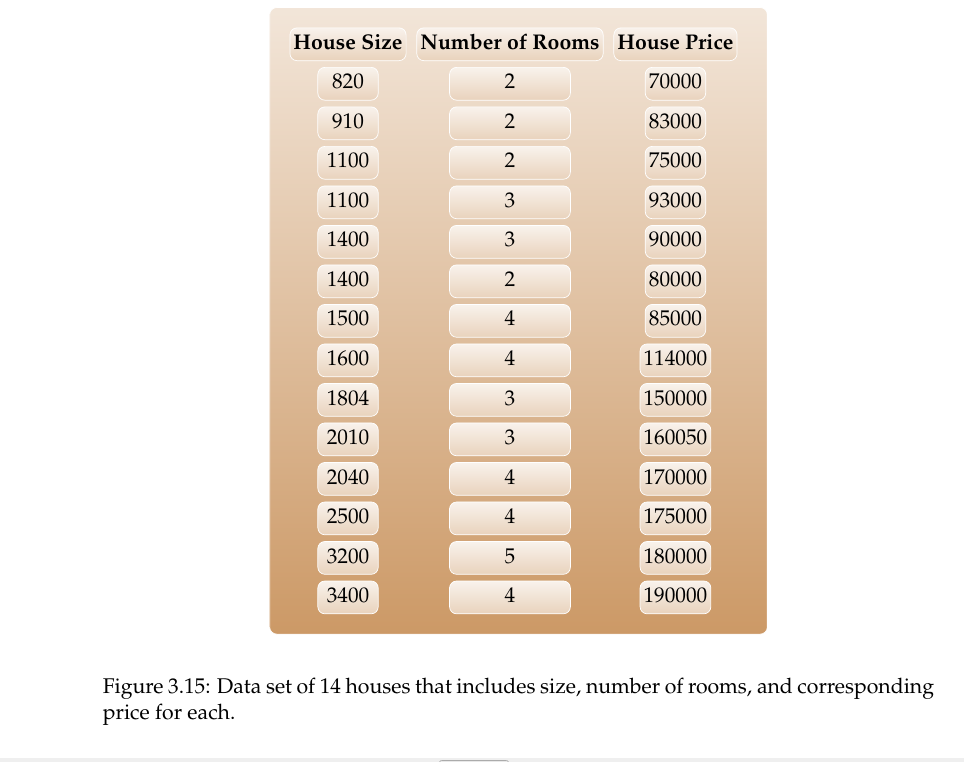

Planteemos la hipotesis:

$$h(\theta_0, \theta_1, \theta_2; x_1, x_2)= \theta_0 + \theta_1 x_1 + \theta_2 x_2 .$$
Esto es un plano.
Lo podemos llevar a forma matricial donde la matriz de datos es

\begin{eqnarray}
X =
\begin{pmatrix}
1 & 820 & 2  \\
1 & 910 & 2  \\
\vdots & \vdots & \vdots \\
1 & 3400 & 4  \\
\end{pmatrix}
\end{eqnarray}

donde $\theta$ es
$$ \theta =
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2
\end{pmatrix}
$$

donde las etiquetas (precios) es $y$

$$ y=
\begin{pmatrix}
70000 \\
83000 \\
\vdots \\
190000
\end{pmatrix}.
$$
El sistema es
$$ h(\theta) = X \theta.$$



La idea es igual, es decir se quiere minimizar

$$\frac12 \| h(\theta) - y \|^2 = \frac12 \| X \theta - y \|^2 .$$

Como procedimos anteriormente, podermos resolvere este problema de 3 maneras diferentes (o mas?)

* Usar las ecuaciones normales
$$X^T X \theta = X^T y .$$
y si $X^T X$ tiene inversa entonces
$$ \theta = (X^T X)^{-1} X^T y .$$
Si $X^T X$ no tiene inversa (para este problema tiene)
$$ \theta = (X^T X + \lambda I )^{-1} X^T y .$$, $\lambda > 0$
(Tikhnovo regularization), $\lambda$ pequenho.

* Usar la pseudoinversa. Si $X^+$ es la pseudoinversa,
$$ \theta = X^+ y.$$

* Usando metodos de descenso.  Formule la funcion de costo
$$ J(\theta) = \frac12 \| h(\theta) - y \|^2 + \lambda \| x \|^2.$$
use metodos de gradiente.



## Feature normalization (normalizacion de atributos)
Observen de nuevo la Figura de arriba, y vean las columnas del area de la casa y el numero de cuartos. Hay una gran disparidad en la escala. Mientras los cuartos son numeros entre 1 y 5, el area esta por los miles. Esta disparidad de escala genera problemas de convergencia en dos sentidos.

* Las elipses (elipsoides) que representan los contornos son muy alargadas y la convergencia por el gradiente presenta un zigzageo muy largo y lento. Lenta convergencia.

* El numero de condicion $\kappa = \lambda_1/\lambda_n$ es grande.  Esto no es bueno, esto afecta no solo la convergencia sino la precision.

* Se puede generar un sesgo, por una columna 1000 veces mas grande que la otra.


Para contrarestar este problema se usa la normalizacion de las columnas de la matriz $X$ (features)


Antes de discutir los metodos de regularizacion veamos que esto no afecta negativamente la solucion. Se puede pensar que al regularizar se esta cambiando el problema por otro que la solucion deja de ser valida.


El problem original es:

$$ X \theta = y. \tag{2} $$

Normalizamos la matriz $X$ y obtenemos otro problema distinto


$$X_n \theta_n = y \tag{3} .$$
Es importante almacenar todos los parametros de normalizacion.
Con esto los pasos son:

* Se  plantea la ecuacion (2)
* Se normaliza la matriz $X$, se planta la ecuacion (3).
Se guardan los parametros usados para normalizar esta ecuacion.
* Se resuelve la Ecuacion (3), para $\theta_n

* Una vez se entrena el sistema y se obtiene $\theta_n$. Se toma
una nueva matriz de datos $\tilde{X}$. Se normaliza, exactamente con los mismos parametros con que se normalizo $X$ (estan en la memoria del computador) resultando en $\tilde{X}_n$. Y luego se obtiene los nuevos resultados
$\tilde{X}_n \theta_n$

### Metodos de normalizacion

* Estandarizacion (Standarization): Se normaliza **cada columna** de forma que tenga media 0 y desviacion estandard 1.
Es decir, se aplica a cada columna el algoritmo

Asumimos que $X$ es $m \times n$


$$X_j := \frac{X_j- \mu_j}{\sigma_j} .$$
donde:

1. $X_j$ es la columna $j$ de $X$, antes a la derecha, despues a la izquierda.
2. Donde
$$ \mu_j =  \frac{\sum_{i=1}^m x_{ij}}{m}.$$
$$ \sigma_j =  \sqrt{ \frac{\sum_{i=1}^m (x_{ij}-\mu_j)^2}{m}}.$$

Es decir, se calcula columna-por-columna, la media y la desviacion estandard, se resta la media y se divide por la desviacion estandard.

* Mean normalizacion. Normalizacion de la media.


$$X_j := \frac{X_j - \mu_j}{\max_i \{x_{ij}\} - \min_i \{ x_{ij} \}} .$$

* Min-Max scaling: (escalamiento por min-max). La formula es

$$X_j := \frac{X_j - \min_i \{x_i \}}{
\max_i \{x_{ij}\} - \min_i \{ x_{ij} \}
} .$$

Se deja como ejercicio, verificar que aca los numeros que se producen estan entre 0 y 1.

* Normalizacion del vector $X_j$ usando la norma 2.
Es decir.

$$X_j := \frac{X_j}{\| X_j \|} .$$

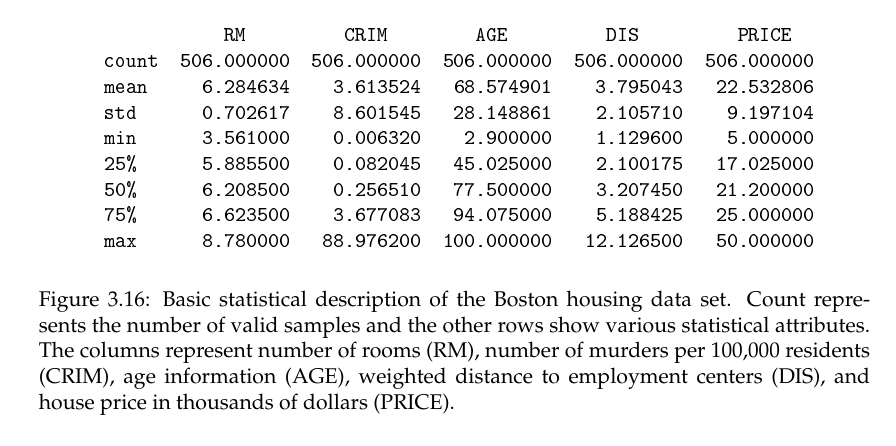

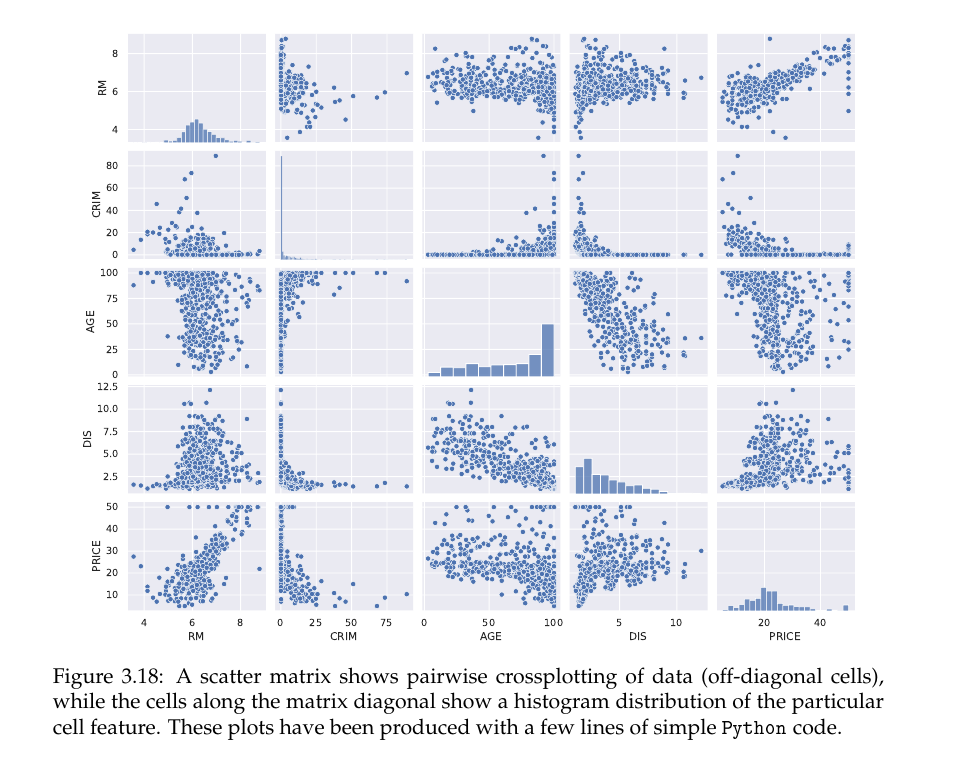

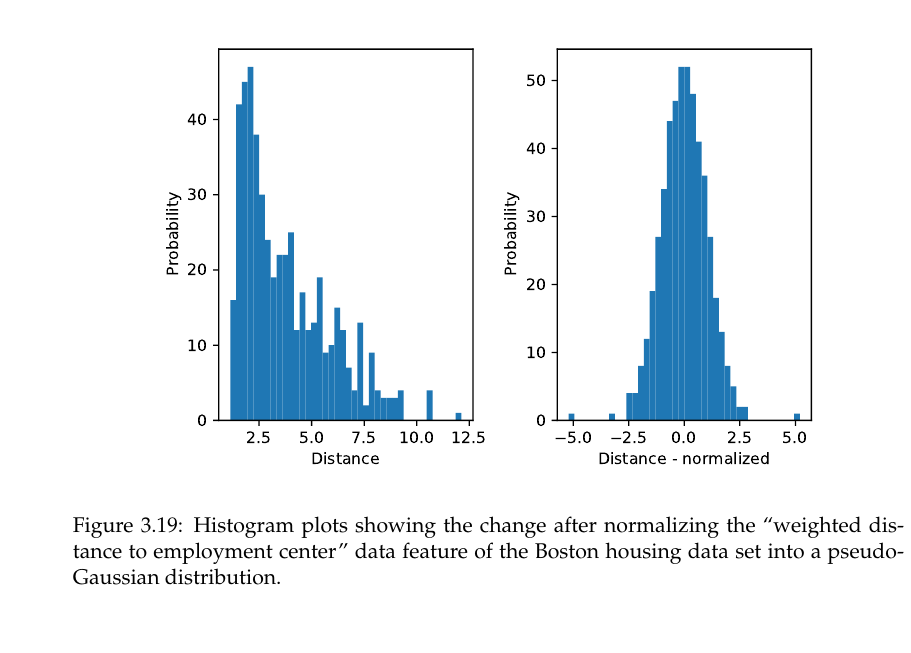

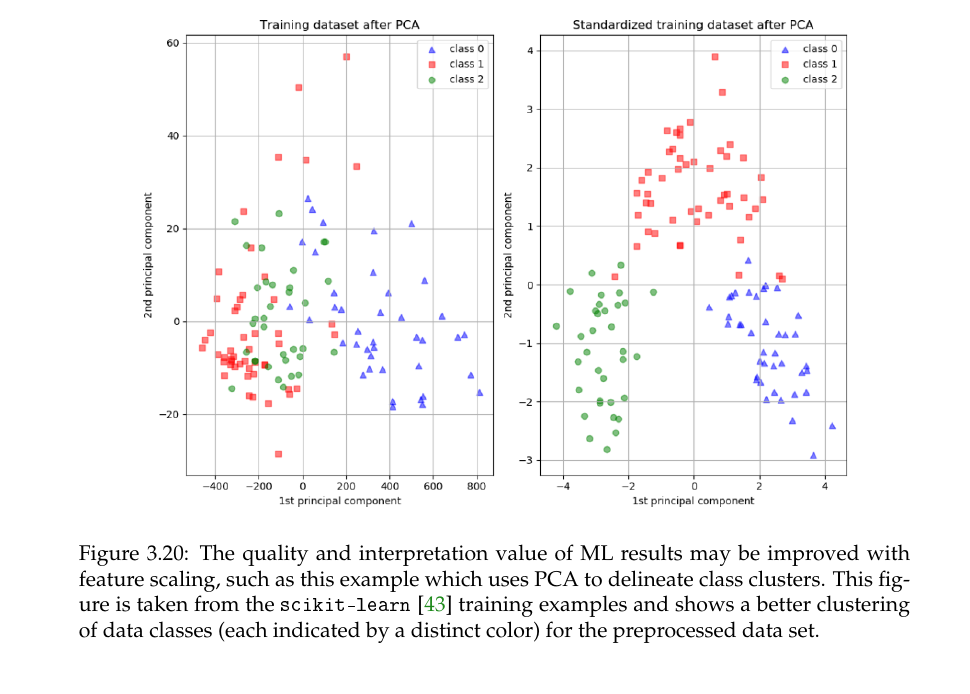

## La regresion polinomial tambien es regresion lineal. Veamos por que.

Piense en vez de una linea recta, queremos adapatar nuestros datos (un solo atributo) a un polinomio de orden $n$. Es decir

$$h(\theta, x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_n x^n .$$
Esta funcion es el producto interno de dos vectores


$$ h(\theta ,x ) = (\theta_0, \theta_1, \cdots,  \theta_n) \cdot  (1, x, x^2, \cdots, x^n) = X^T \theta = \langle X, \theta \rangle.$$
donde $X=(1, x, \cdots, x^n)$, $\theta=(\theta_0, \theta_1, \cdots, \theta_n)$. Fijense que esta funcion es lineal en $\theta$. Es decir

$$X^T ( \theta_1 + \theta_2) = X^T \theta_1 + X^T \theta_2 .$$
$$X^T ( \alpha \theta) = \alpha X^T \theta .$$

Si llevamos a matrices, para $m$ puntos.

$$h(\theta, x_1) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \cdots + \theta_n x_1^n .$$
$$h(\theta, x_2) = \theta_0 + \theta_1 x_2 + \theta_2 x_2^2 + \cdots + \theta_n x_2^n .$$
$$h(\theta, x_m) = \theta_0 + \theta_1 x_m + \theta_2 x_m^2 + \cdots + \theta_n x_m^n .$$
Matricialmente esto es:


\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_m & x_m^2 & \cdots & \cdots & \cdots & x_m^n \\
\end{pmatrix}

Si $m=n+1$ la matriz seria cuadrada y se llama la matriz de
[Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix#:~:text=In%20linear%20algebra%2C%20a%20Vandermonde,all%20zero%2Dbased%20indices%20and).


Esta matriz es la que resulta de hacer interpolacion de Lagrange.
De esta forma la **interpolacion** es una caso **especial** de la regresion **polinomial**.
$$ V=
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n+1} & x_{n+1}^2 & \cdots & \cdots & \cdots & x_{n+1}^n \\
\end{pmatrix}
$$

La matriz de Vandermonde es no singular, entonces

$$ \theta = V^{-1} y.$$
Esta solucion es simplemente, interpolacion de Lagrange.
Veamos los problemas de la regresion polinomial.




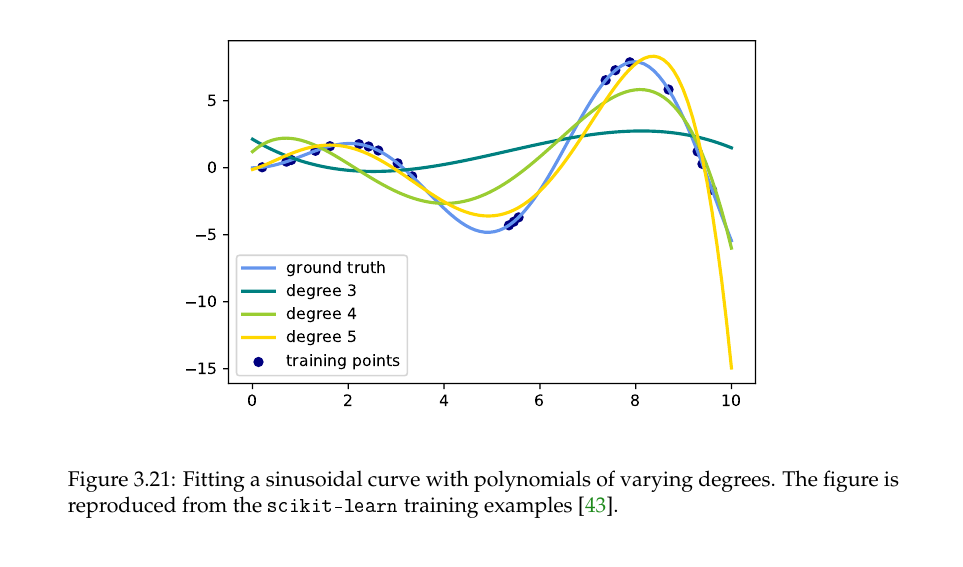

La funcion real de la que se va a aplicar regresion polinomial, es
$f(x)= x \sin x$. Corresponde la linea continua azul. Los puntos azules se toman sobre esta linea con una distribucion no uniforme. Se quiere aplicar regresion polinomial de distintos ordenes.

## Regresion polinomial en varias variables.
Como en el problema de la casa podemos tener varios atributos.
Veamos un ejemplo donde se tienen dos atributos $x_1, x_2$,
los queremos ajustar a un polinomio cuadratico

$$h(\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, x_1, x_1) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_1^2 .$$

La matrix correspondiente a este polinomio es:


$$X =
\begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 & x_{12}^2  \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 & x_{22}^2  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 & x_{m2}^2
\end{pmatrix}
$$
Al final, el problema que queremos resolver es $X \theta = y$.



## Regresion lineal generalizada a polinomios.
Pensemos en polinomio en dos variables $x_1, x_2$ hasata orden 3 y evitamos los terminos cuadraticos purtos $x_1^2$, $x_2^2$.

$$h(\theta) = p_{\theta}(x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 x_2 + \theta_5 x_1 x_2^2 + \theta_6 x_1^3 + \theta_7 x_2^2 .$$

La matriz correspondiente es
$$ X =
\begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 x_{12} & x_{11} x_{12}^2 & x_{11}^3 & x_{22}^3 \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 x_{22} & x_{21} x_{22}^2 & x_{21}^3 & x_{22}^3 \\
\vdots & \vdots & \vdots & \vdots & \vdots  & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots  & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots  & \vdots & \vdots & \vdots \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 x_{m2} & x_{m1} x_{m2}^2 & x_{m1}^3 & x_{m2}^3 \\
\end{pmatrix}
.$$

En general no tiene que ser polinomios. Usted puede definir una base, por ejemplo $\{1, x, \sqrt{x} \}$
y pensar en

$$ h(\theta) =  \theta_0 + x \theta_1  + \sqrt{x} \theta_2 .$$
Se deja de tarea construir la matrix $X$ para este problema.
En vez de $\sqrt{x}$ usted pudo haber escogido $\sin x$, $\exp(x)$, $\log(x)$, etc.

Eso si, que quede muy claro. No puede haber potencias, o raices, o logs, etc en los $\theta$. Los $\theta$ deben ser lineales.
Por ejemplo

$$h(\theta) = \theta_0 + x \theta_1^2 .$$
No se ajusta a $X \theta = y$.
Un truco es llamar a $\theta_1^2=\alpha_1$ , $\theta_0=\alpha_0$.
Y resolver

$$ h(\alpha) = \alpha_0 + x \alpha_1 .$$
Es lineal en $\alpha$. Resuelva $X \alpha = y$.
Luego al final $\theta_0=\alpha_0$, $\theta_1 = \sqrt{\alpha_1}$.




